<a href="https://colab.research.google.com/github/eghelbur/Predict-House-Prices-Project/blob/main/Predict_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
# Set the aesthetics style of the plots
sns.set_style("whitegrid")

In [ ]:
boston_df = pd.read_csv("boston.csv")

# **Step 1: Analyze and explore the Boston house price data**

In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Remove the unnecessary 'Unnamed: 0' column
boston_df = boston_df.drop(columns=['Unnamed: 0'])

In [ ]:
# Renaming columns
boston_df.columns = [
    'CrimeRate', # Per capita crime rate by town.
    'LargeLots', # Proportion of residential land zoned for lots over 25,000 sq.ft
    'IndustrialProportion', # Proportion of non-retail business acres per town.
    'CharlesRiver', # Charles River dummy variable (1 if tract bounds river, 0 otherwise).
    'NitricOxideConc', # Nitric oxides concentration (parts per 10 million).
    'AvgRoomsPerDwelling', # Average number of rooms per dwelling.
    'ProportionOldHomes', # Proportion of owner-occupied units built prior to 1940.
    'DistToEmploymentCenters', # Weighted distances to five Boston employment centers.
    'HighwayAccessibilityIndex', # Index of accessibility to radial highways.
    'PropertyTaxRate', # Full-value property-tax rate per $10,000.
    'StudentTeacherRatio', # Pupil-teacher ratio by town.
    'BlackResidentProportion', # 1000(Bk - 0.63)^2 where Bk is the proportion of black residents by town.
    'LowerStatusPopulation', # Percentage of lower status of the population.
    'MedianHomeValue' # Median value of owner-occupied homes in $1000's.
]

In [ ]:
boston_df.head()

,CrimeRate,LargeLots,IndustrialProportion,CharlesRiver,NitricOxideConc,AvgRoomsPerDwelling,ProportionOldHomes,DistToEmploymentCenters,HighwayAccessibilityIndex,PropertyTaxRate,StudentTeacherRatio,BlackResidentProportion,LowerStatusPopulation,MedianHomeValue
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Summary Statistics
print(boston_df.describe())

        CrimeRate   LargeLots  IndustrialProportion  CharlesRiver  \
count  506.000000  506.000000            506.000000    506.000000   
mean     3.613524   11.363636             11.136779      0.069170   
std      8.601545   23.322453              6.860353      0.253994   
min      0.006320    0.000000              0.460000      0.000000   
25%      0.082045    0.000000              5.190000      0.000000   
50%      0.256510    0.000000              9.690000      0.000000   
75%      3.677083   12.500000             18.100000      0.000000   
max     88.976200  100.000000             27.740000      1.000000   

       NitricOxideConc  AvgRoomsPerDwelling  ProportionOldHomes  \
count       506.000000           506.000000          506.000000   
mean          0.554695             6.284634           68.574901   
std           0.115878             0.702617           28.148861   
min           0.385000             3.561000            2.900000   
25%           0.449000             5.885500

In [ ]:
# Check for Missing Values
print(boston_df.isnull().sum())

CrimeRate                    0
LargeLots                    0
IndustrialProportion         0
CharlesRiver                 0
NitricOxideConc              0
AvgRoomsPerDwelling          0
ProportionOldHomes           0
DistToEmploymentCenters      0
HighwayAccessibilityIndex    0
PropertyTaxRate              0
StudentTeacherRatio          0
BlackResidentProportion      0
LowerStatusPopulation        0
MedianHomeValue              0
dtype: int64


<Axes: xlabel='AvgRoomsPerDwelling', ylabel='Count'>

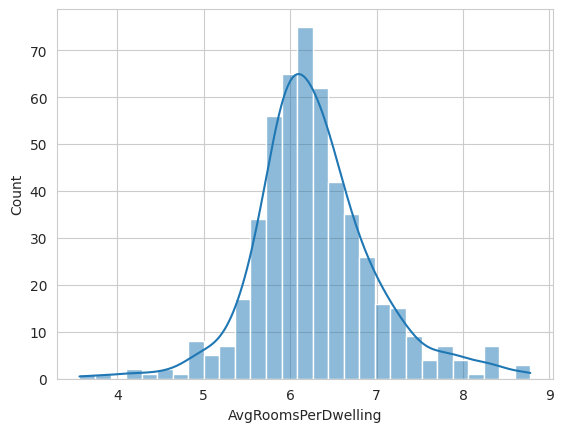

In [ ]:
# Visualization of distributions can be done using seaborn or matplotlib's histogram function.
# For example, to create a histogram of the 'AvgRoomsPerDwelling' feature (average number of rooms):
sns.histplot(boston_df['AvgRoomsPerDwelling'], kde=True)

<Axes: xlabel='AvgRoomsPerDwelling', ylabel='MedianHomeValue'>

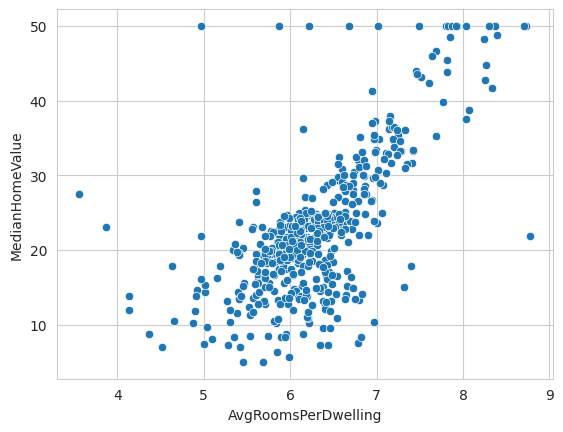

In [ ]:
# Scatter plot of 'AvgRoomsPerDwelling' vs 'MedianHomeValue'
sns.scatterplot(x='AvgRoomsPerDwelling', y='MedianHomeValue', data=boston_df)

In [ ]:
boston_df.head()

,CrimeRate,LargeLots,IndustrialProportion,CharlesRiver,NitricOxideConc,AvgRoomsPerDwelling,ProportionOldHomes,DistToEmploymentCenters,HighwayAccessibilityIndex,PropertyTaxRate,StudentTeacherRatio,BlackResidentProportion,LowerStatusPopulation,MedianHomeValue
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<Axes: >

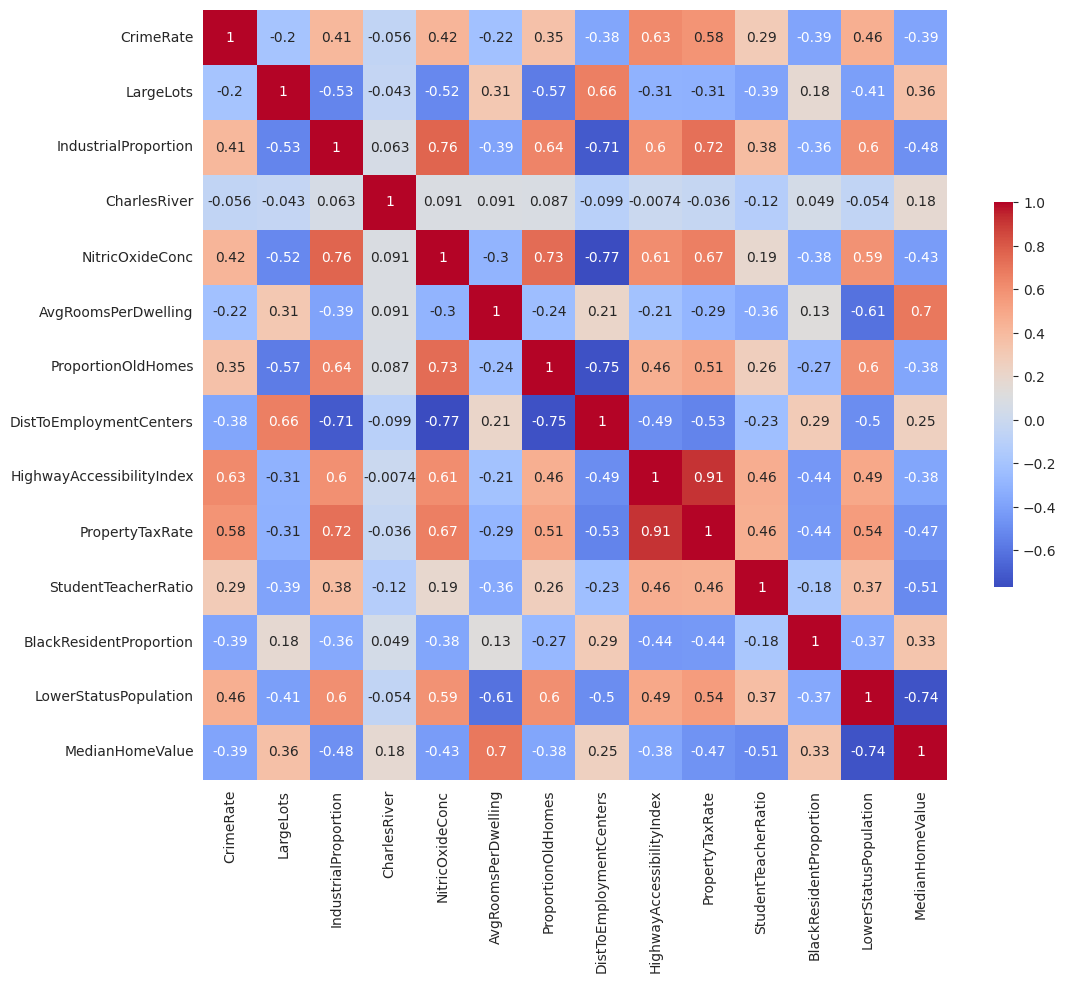

In [ ]:
# @title Default title text
# Correlation matrix:
correlation_matrix = boston_df.corr()

plt.figure(figsize=(12, 10))

# Generate a mask for  the upper  triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={"shrink": .5})

# Step 2: Split Your Data for Training and Testing
We will split the dataset into training and testing sets. This is crucial as it allows us to train the model on one part of the data and test its performance on an unseen part of the data to evaluate how well it generalizes.



In [ ]:
# Define the features and the target variable
X = boston_df.drop('MedianHomeValue', axis=1)
y = boston_df['MedianHomeValue']

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the sizes of the training and test sets to verify
print("Training set size", X_train.shape)
print("Testing set size", X_test.shape)

Training set size (404, 13)
Testing set size (102, 13)


# Step 3: Train the Multivariable Regression Model
Once we have our training and testing sets, we will train a multivariable linear regression model. This model will use multiple features from the dataset to predict the median home value.




In [ ]:
# Initialize the model
model = LinearRegression()

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
# Print a preview of the predictions
print("Predictions on test set:", y_pred[:5])

Predictions on test set: [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]


# Step 4: Evaluate the Model's Coefficients and Residuals
We'll look at the coefficients to understand the influence of each feature on the median home value. We'll also compute and plot the residuals to see how well the model fits the data.


In [ ]:
# Evaluate the model using R-squared and Mean Squared Error (MSE)
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print("R-squared", r2)
print("Mean Squared Error:", mse)

R-squared 0.6687594935356326
Mean Squared Error: 24.291119474973478


In [ ]:
# Examine the model's coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print(coefficients)

                           Coefficients
CrimeRate                     -0.113056
LargeLots                      0.030110
IndustrialProportion           0.040381
CharlesRiver                   2.784438
NitricOxideConc              -17.202633
AvgRoomsPerDwelling            4.438835
ProportionOldHomes            -0.006296
DistToEmploymentCenters       -1.447865
HighwayAccessibilityIndex      0.262430
PropertyTaxRate               -0.010647
StudentTeacherRatio           -0.915456
BlackResidentProportion        0.012351
LowerStatusPopulation         -0.508571


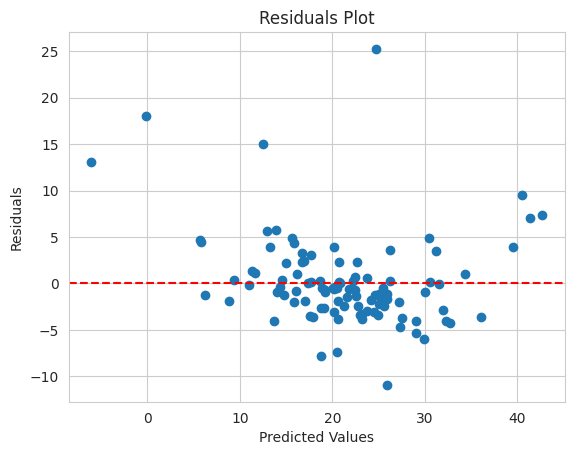

In [ ]:
# Plotting residuals
plt.scatter(y_pred, y_test - y_pred)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

#Step 5: Use Data Transformation to Improve Model Performance
 Based on the initial evaluation, we may find that some transformations (like scaling or normalizing features, or log transformations) could help improve the model's performance.

In [ ]:
# Apply log transformation to a skewed feature as an example
X_train_transformed = X_train.copy()
X_train_transformed['CrimeRate'] = np.log1p(X_train_transformed['CrimeRate'])

In [ ]:
# Re-train the model on the transformed data to compare performance
model_transformed = LinearRegression()
model_transformed.fit(X_train_transformed, y_train)
y_pred_transformed = model_transformed.predict(X_test.assign(CrimeRate=np.log1p(X_test['CrimeRate'])))


In [ ]:
# Evaluate the transformed model
r2_transformed = model_transformed.score(X_test.assign(CrimeRate=np.log1p(X_test['CrimeRate'])), y_test)
mse_transformed = mean_squared_error(y_test, y_pred_transformed)

print("Transformed R-squared:", r2_transformed)
print("Transformed Mean Squared Error:", mse_transformed)

Transformed R-squared: 0.6691379725940216
Transformed Mean Squared Error: 24.263364173774853


**R²
  (R-squared):** This value indicates that about 66.9% of the variance in the median home values can be explained by the model. It's a measure of how well the observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

  
**MSE (Mean Squared Error):** This represents the average squared difference between the actual and predicted values, with a lower value indicating a better fit.

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Re-train the model on the scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [ ]:
# Evaluate the scaled model
r2_scaled = model_scaled.score(X_test_scaled, y_test)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

print("Scaled R-squared", r2_scaled)
print("Scaled Mean Squared Error:", mse_scaled)

Scaled R-squared 0.668759493535632
Scaled Mean Squared Error: 24.291119474973513


In [ ]:
# Initialize Ridge regression with an example alpha value
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [ ]:
# Evaluate Ridge model
r2_ridge = ridge_model.score(X_test_scaled, y_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Ridge R-squared", r2_ridge)
print("Ridge Mean Aquared Error:", mse_ridge)

Ridge R-squared 0.6684624359643558
Ridge Mean Aquared Error: 24.312903830491614


In [ ]:
# Cross-validate the Ridge regression model
ridge_cv_r2 = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='r2')
ridge_cv_mse = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print("Cross-Validated R-squared:", np.mean(ridge_cv_r2))
print("Cross-Validated Mean Squared Error:", -np.mean(ridge_cv_mse))

Cross-Validated R-squared: 0.724514155284955
Cross-Validated Mean Squared Error: 23.64875458302763


# Review of Results

**1. Scaling the Features:**

*   R-squared: 0.6688
*   MSE: 24.2911

The scaling slightly changed the performance, indicating that feature scale may impact the model, but the changes were minimal.


**2. Ridge Regression:**

*   R-squared: 0.6685
*   MSE: 24.3129

Ridge regression did not substantially improve the model, suggesting that regularization did not have a significant impact, possibly because the model did not suffer much from high variance or multicollinearity issues.

**3. Cross-Validation of Ridge Regression:**

*   Cross-Validated R-squared: 0.7245
*   Cross-Validated MSE: 23.6488

The cross-validated scores are encouraging, particularly the increase in the R-squared value, which implies that the model is quite robust across different subsets of the data. The decrease in MSE also suggests improved prediction error rates across these subsets.








# Step 6: Final Model Evaluation and Deployment
1. Evaluate on the Complete Dataset: To ensure the model is robust, evaluate it using the entire dataset. This provides a final confirmation of the model's performance.
2. Prepare for Deployment: Depending on your requirements, this could mean saving the model to a file, documenting its usage, and possibly creating a small web application or a script that can take input parameters and return predictions.

In [ ]:
# Fit the model on the entire dataset
final_model = Ridge(alpha=1.0)
final_model.fit(scaler.transform(X), y)

Ridge()

In [ ]:
# Evaluate the model on the entire dataset
y_pred_final = final_model.predict(scaler.transform(X))
final_r2 = final_model.score(scaler.transform(X), y)
final_mse = mean_squared_error(y, y_pred_final)

print("Final R-squared on the entire dataset:", final_r2)
print("Final Mean Squared Error on the entire dataset:", final_mse)

Final R-squared on the entire dataset: 0.7406306538334394
Final Mean Squared Error on the entire dataset: 21.895845083895907


In [ ]:
# Save the model
joblib.dump(final_model, 'final_ridge_model.joblib')

['final_ridge_model.joblib']

In [ ]:
# Load the model (for prediction or further use)
loaded_model = joblib.load('final_ridge_model.joblib')

In [ ]:
# Define a sample input data point (for demonstration purposes)
new_data_dict = {
    'CrimeRate': [0.02],
    'LargeLots': [18.0],
    'IndustrialProportion': [2.31],
    'CharlesRiver': [0],
    'NitricOxideConc': [0.538],
    'AvgRoomsPerDwelling': [6.575],
    'ProportionOldHomes': [65.2],
    'DistToEmploymentCenters': [4.0900],
    'HighwayAccessibilityIndex': [1],
    'PropertyTaxRate': [296],
    'StudentTeacherRatio': [15.3],
    'BlackResidentProportion': [396.90],
    'LowerStatusPopulation': [4.98]
}

# Convert the dictionary to a DataFrame
new_data_df = pd.DataFrame(new_data_dict)

# Scale the new data using the same scaler used on the training data
new_data_scaled = scaler.transform(new_data_df)

# Make a prediction with the loaded model
predicted_value = loaded_model.predict(new_data_scaled)

# Convert the prediction to dollars
predicted_value_dollars = predicted_value[0] * 1000  # Multiply by 1000 to get the dollar amount

# Format the prediction to include commas for thousands, millions, etc.
predicted_value_formatted = "${:,.2f}".format(predicted_value_dollars)

# Print the prediction
print("Predicted Median Home Value:", predicted_value_formatted)

Predicted Median Home Value: $30,026.39
